In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('Flipkart_mobile_brands_scraped_data.csv')
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


## Flipkart Mobiles Dataset
This dataset containing specs of various Mobile brands in India has been scraped from an ecommerce website 'Flipkart'. This dataset has 2647 samples with 8 attributes. There are some missing values as well.

Attributes-

Brand- Name of the Mobile Manufacturer
Model- Model number of the Mobile Phone
Color- Color of the model. Missing or Null values indicate no specified color of the model offered on the ecommerce website.
Memory - RAM of the model (4GB,6GB,8GB, etc.)
Storage- ROM of the model (32GB,64GB,128GB,256GB, etc.)
Rating- Rating of the model based on reviews (out of 5). Missing or Null values indicate there are no ratings present for the model.
Selling Price- Selling Price/Discounted Price of the model in INR when this data was scraped. Ideally price indicates the discounted price of the model
Original Price- Actual price of the model in INR. Missing values or null values would indicate that the product is being sold at the actual price available in the 'Price' column.

In [4]:
data.shape

(2647, 8)

In [5]:
data.describe()

,Rating,Selling Price,Original Price
count,2647.000000,2644.000000,969.000000
mean,4.001700,26461.362330,29852.605779
std,0.997499,29833.135164,27659.141051
min,0.000000,1000.000000,1599.000000
25%,4.000000,9490.000000,12999.000000
50%,4.300000,14999.000000,18999.000000
75%,4.400000,29998.250000,34999.000000
max,5.000000,179900.000000,189999.000000


In [6]:
data.fillna(0).iloc[:3]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0


<AxesSubplot:>

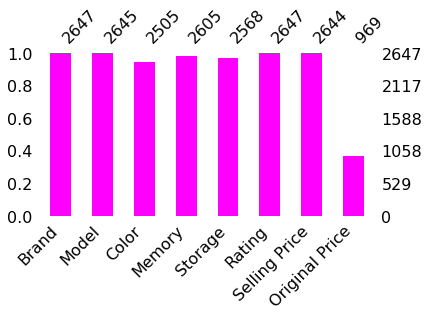

In [8]:
msno.bar(data,figsize=(6,3),color='magenta')

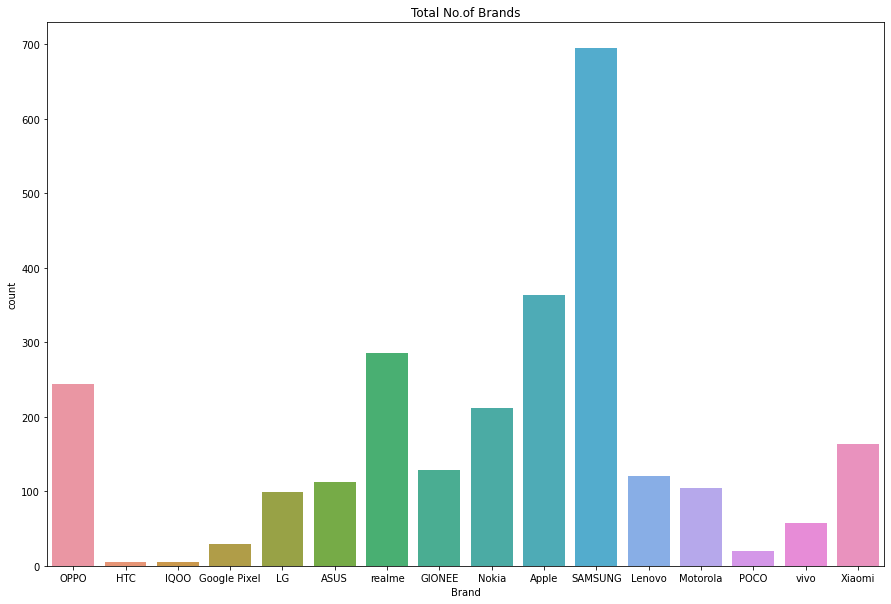

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='Brand',data=data)
plt.title("Total No.of Brands")
plt.show()

<Figure size 1080x720 with 0 Axes>

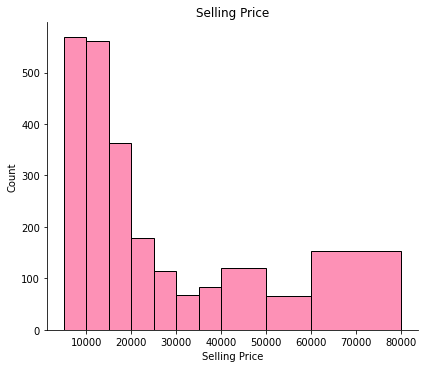

In [16]:
plt.figure(figsize=(15,10))
sns.displot(data, x='Selling Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')
plt.title("Selling Price")
plt.show()

<Figure size 1080x720 with 0 Axes>

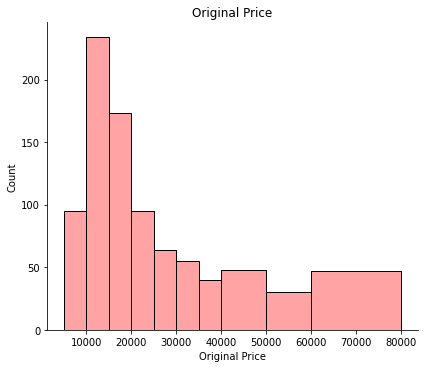

In [17]:
plt.figure(figsize=(15,10))
sns.displot(data, x='Original Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#ff8486')
plt.title("Original Price")
plt.show()

<Figure size 1080x720 with 0 Axes>

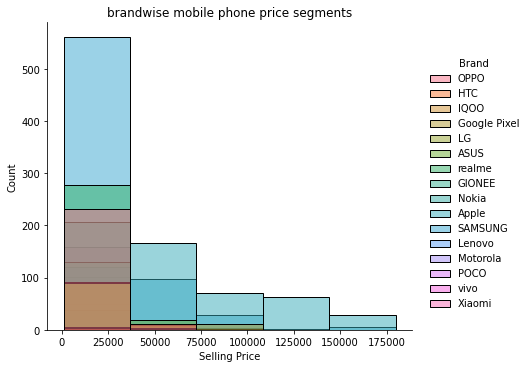

In [19]:
#brandwise mobile phone price segments
plt.figure(figsize=(15,10))
sns.displot(data, x='Selling Price',bins=5, hue='Brand',aspect=1.2)
plt.title("brandwise mobile phone price segments")
plt.show()

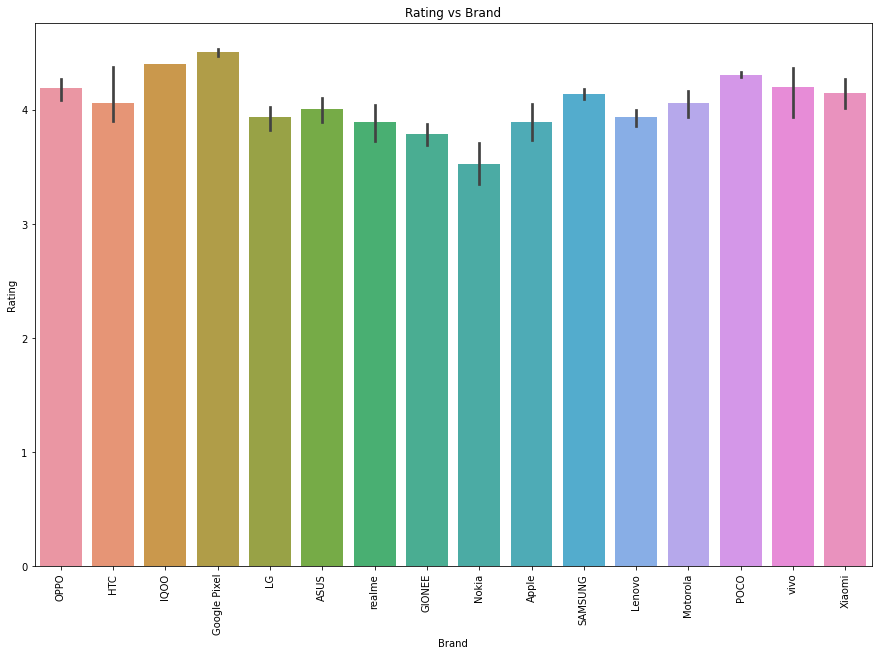

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(y="Rating", x="Brand", data=data)
plt.xticks(rotation=90)
plt.title("Rating vs Brand")
plt.show()

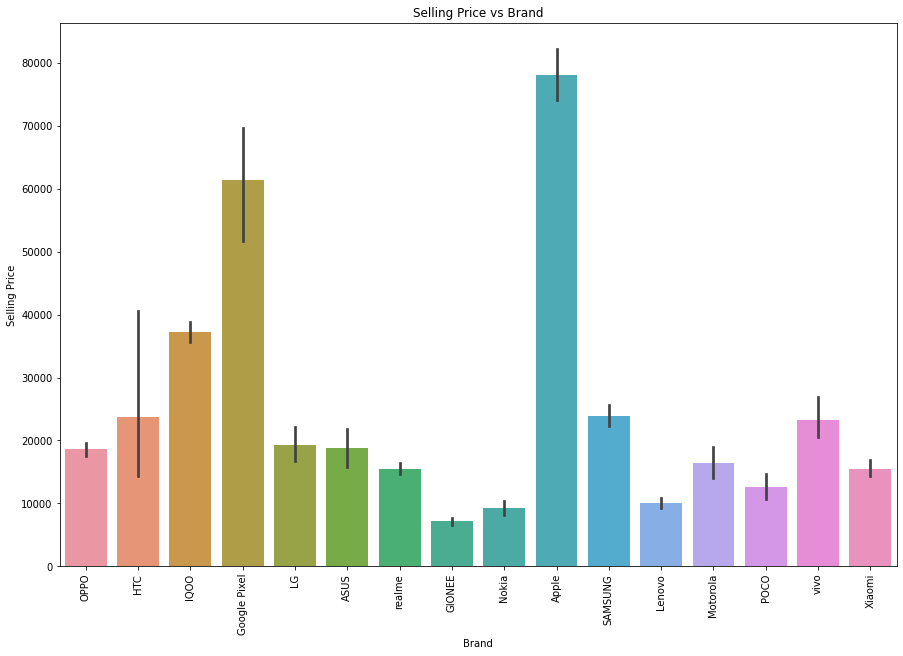

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(y="Selling Price", x="Brand", data=data)
plt.xticks(rotation=90)
plt.title("Selling Price vs Brand")
plt.show()

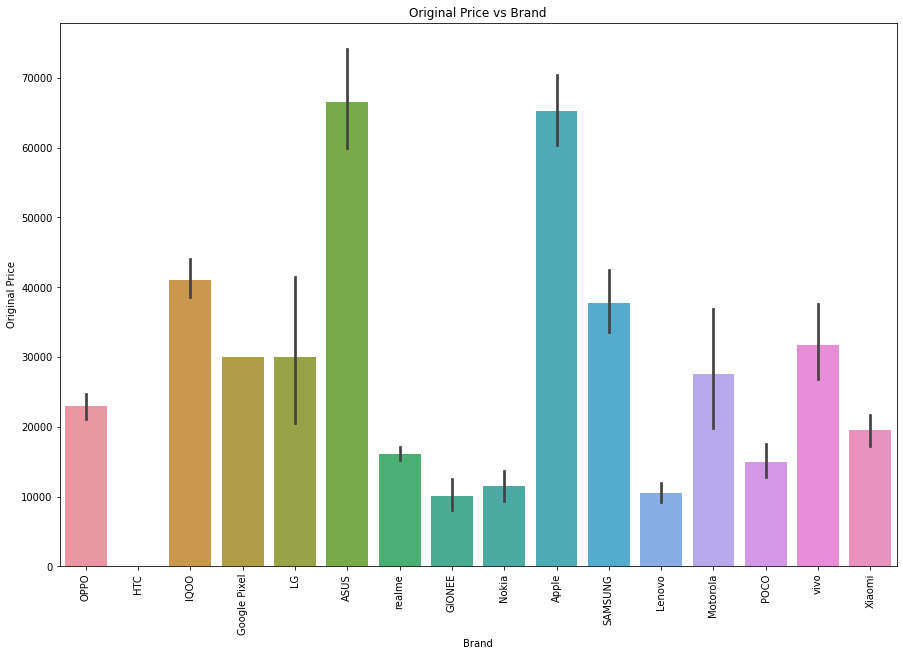

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(y="Original Price", x="Brand", data=data)
plt.xticks(rotation=90)
plt.title("Original Price vs Brand")
plt.show()

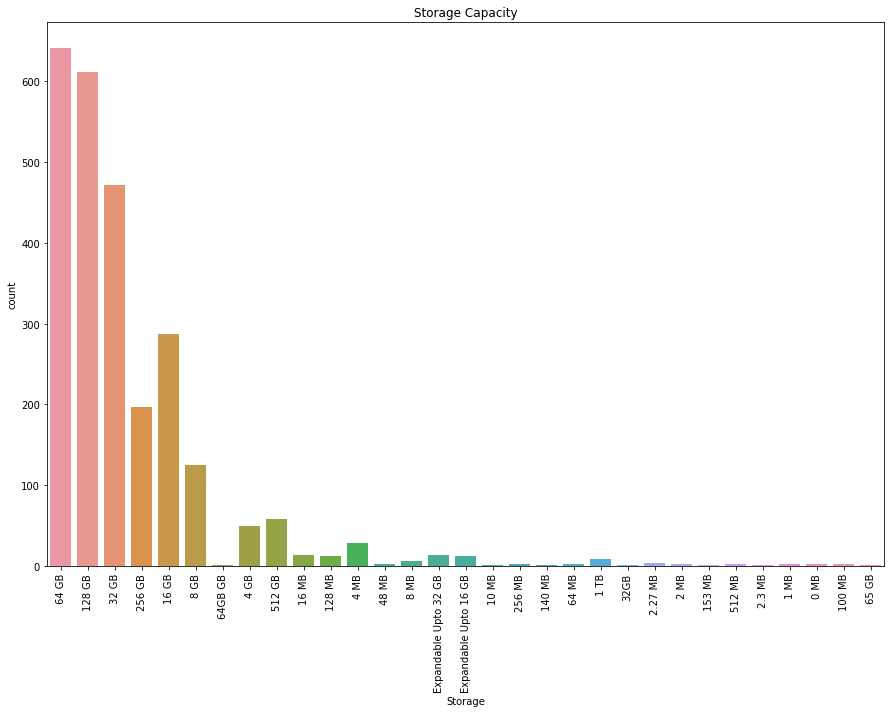

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(x='Storage',data=data)
plt.title("Storage Capacity")
plt.xticks(rotation=90)
plt.show()

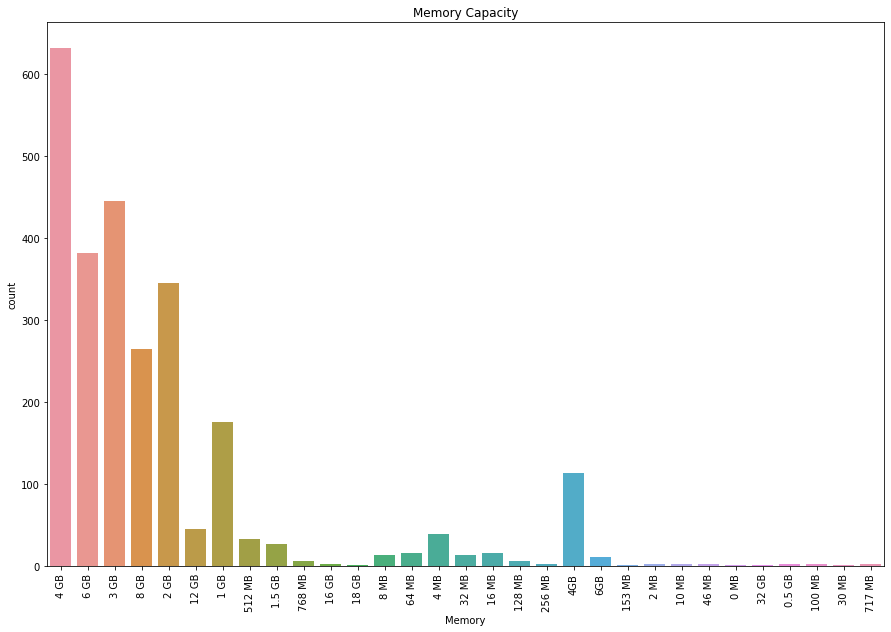

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x='Memory',data=data)
plt.title("Memory Capacity")
plt.xticks(rotation=90)
plt.show()

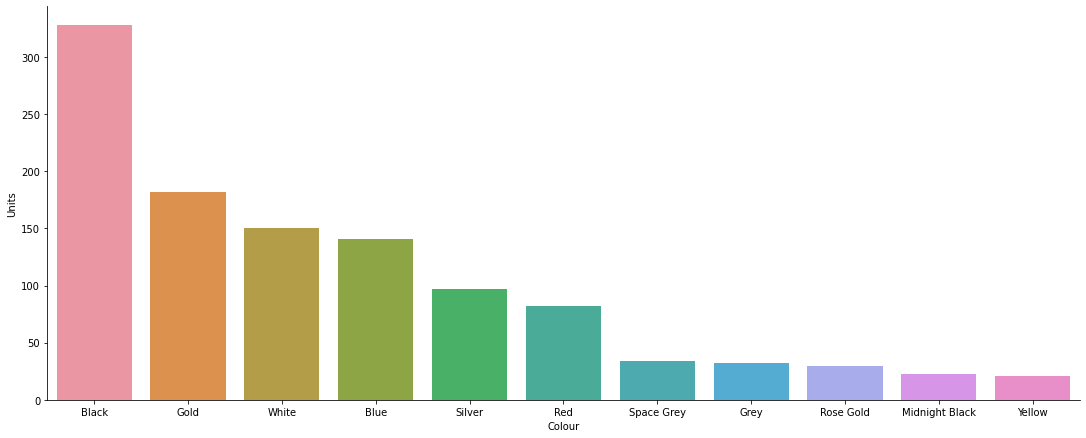

In [42]:
Colour = data["Color"].value_counts(ascending=False)[0:11].reset_index()
Colour.columns = ["Colour", "Units"]
sns.catplot(x="Colour", y="Units", kind="bar", data=Colour,height=6, aspect=2.5)

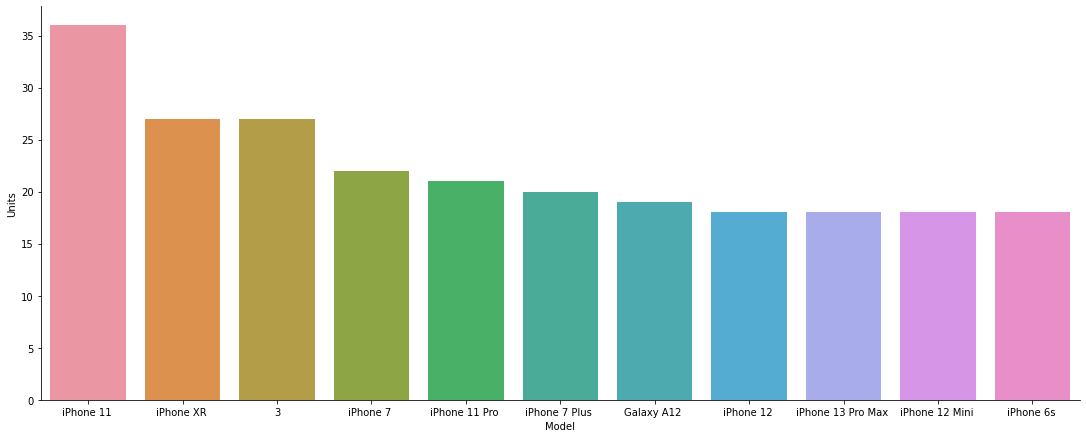

In [43]:
Models = data["Model"].value_counts(ascending=False)[0:11].reset_index()
Models.columns = ["Model", "Units"]
sns.catplot(x="Model", y="Units", kind="bar", data=Models,height=6, aspect=2.5)

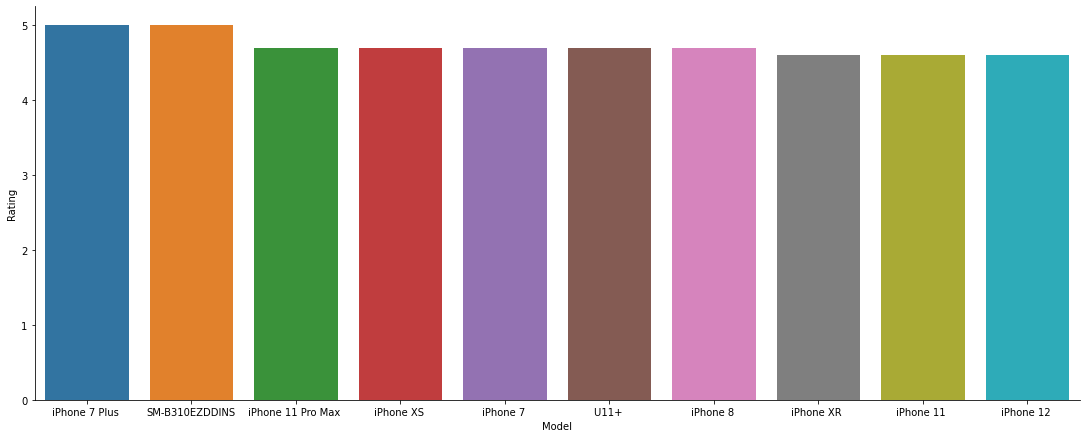

In [44]:
phone_rating = data.sort_values(by=["Rating"], ascending=False)[:40]
phone_rating.groupby("Model").mean()
sns.catplot(x="Model", y="Rating", kind="bar", data=phone_rating, height=6, aspect=2.5)

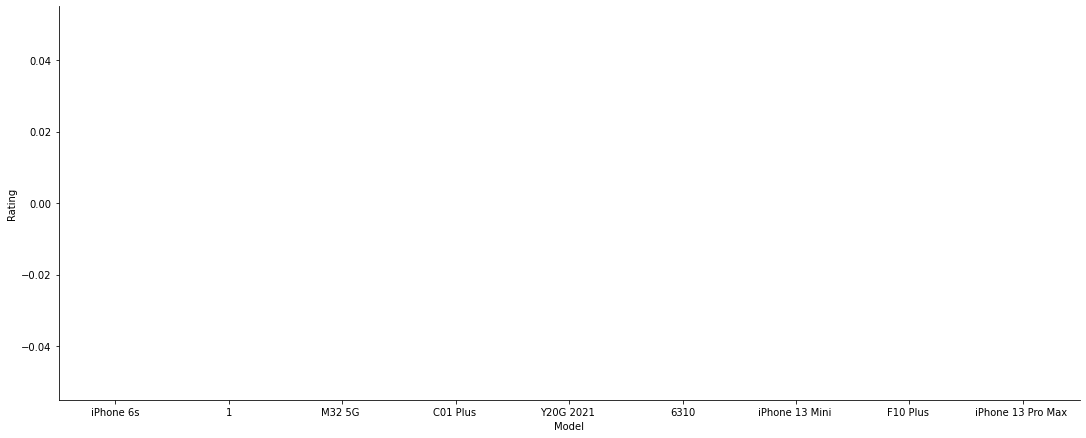

In [46]:
phone_rating = data.sort_values(by=["Rating"], ascending=True)[:11]
phone_rating.groupby("Model").mean()
sns.catplot(x="Model", y="Rating", kind="bar", data=phone_rating, height=6, aspect=2.5)

In [47]:
phone_rating

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
1484,Apple,iPhone 6s,Silver,2 GB,32GB,0.0,29900.0,NaN
582,realme,1,Diamond Black,3 GB,NaN,0.0,11990.0,12990.0
1513,SAMSUNG,M32 5G,Sky blue,6 GB,128 GB,0.0,21499.0,23999.0
925,Nokia,C01 Plus,Blue,2 GB,16 GB,0.0,6499.0,NaN
2438,vivo,Y20G 2021,Purist Blue,NaN,65 GB,0.0,29990.0,34990.0
924,Nokia,6310,NaN,16 MB,8 MB,0.0,4049.0,NaN
1214,Apple,iPhone 13 Mini,Red,4 GB,128 GB,0.0,69900.0,NaN
1008,Nokia,C01 Plus,Blue,2 GB,16 GB,0.0,6499.0,NaN
1010,Nokia,C01 Plus,Grey,2 GB,16 GB,0.0,5999.0,NaN
797,GIONEE,F10 Plus,Rainbow Black,3 GB,32 GB,0.0,8590.0,NaN
